# Business Context 


Predicting the sales of homes in the King County area of Seattle, Washington. 
Our script utilizes a multitude of predictive models to find the algorithm that will define the best score for the data presented. From there we will compare the scores to see where the algorithms fall short and where they seem to exceed and why.


## What does the Housing data set include?

1)Dataset includes details of all the homes sold in 2014-2015 within King County that encompasses Seattle, Washington.

2)The data includes basic housing title information that would be recorded on selling a home including bedrooms, sqft, floors, year built and zip.

3)Along with the basic information, the data also includes other features that might affect pricing like latitude, longitude, view, grade, condition.


## Data features included in the set 

1. id :- Unique  number paired to each sold home.
2. date :- Day which the house is sold.
3. price:- What we are predicting, our target variable
4. bedrooms :- Number of bedrooms. 
5. bathrooms :- Number of bathrooms. 
6. sqft_living :-  Overall total living space in the house in square foot.
7. sqft_lot :  Sqaure foot of the lot.
8. floors: Count of the total floors.
9. waterfront : Access to a waterway. 0 for no, 1 for yes - ENCODED.
10. view : If home is viewed or not 0 means no 1 means yes - ENCODED.
11. condition : Rating of the condition of the home from  1 to 5.
12. grade : Value assigned to the home based on King County standards from 1:11.
13. sqft_above : Square footage of home not including the basement.
14. sqft_basement : Square footage of the home's basement.
15. yr_built : Date the home was built.
16. yr_renovated : If home was renovated. 0 for no, 1 for yes ENCODED.
17. zipcode : Zipcode of the home.
18. lat : Latitude of the location of the home.
19. long : Longitude of the location of the home.
20. sqft_living15 : Living room area in 2015
21. sqft_lot15 : lotSize area in 2015

## What we are trying to solve?

1)Predicting the price of the house will be helpful for a lot of people.

2)Buyers can decide on a limit beyond which they should not pay to buy the house.

3)Sellers can find a limit beyond which they would not get any response from the market, also, what they can modify   to get a better offer.

4)Predicting the housing price based upon the features will help us get there

## How we plan on solving it

1)Predicting the housing price based upon the features associated with it can provide us with a reliable way to predict prices of houses in the future.

2)We will apply various Machine Learning algorithms and test the model’s goodness of fit.

3)Apply Data visualizations techniques to display our findings.

# Importing dependencies 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

Using TensorFlow backend.
C:\Users\soham\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\soham\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\soham\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\soham\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Data Pulling and Cleaning
For the Read Csv file "/insert/your/path/here.csv"

In [38]:
#data = pd.read_csv("/Users/Kasden/Desktop/MSFERM3/AmirZem/Kaggle/kc_house_data.csv")#, names=header_list)
data = pd.read_csv("D:/Fall 20/6334/kc_house_data.csv")

# data cleaning
data.info()

# data cleaning
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The isnull function returns all the values in the columns with 0 missing or NA values

# Exploratory Data Anaylsis

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64


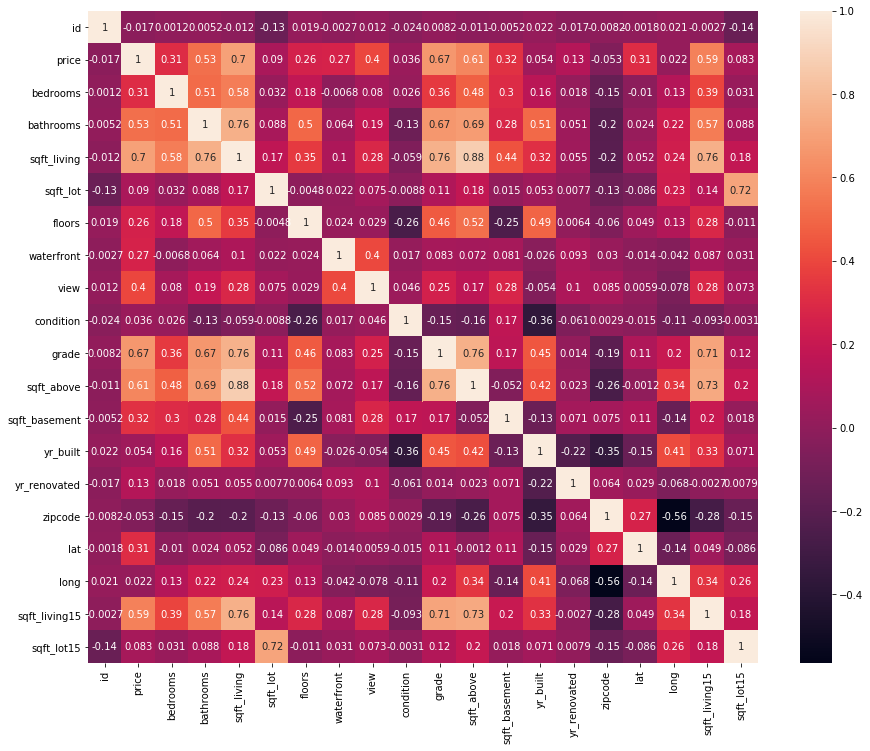

In [39]:
# correlations between all the variables
corr_all = data.corr()
plt.figure(figsize=(15,12))
corrplot = sns.heatmap(corr_all, annot=True)

# correlation of the variables with respect to price
corr_price = data.corr()['price']
print(corr_price)

# matches with r code version
# showing that bathrooms, sqft living , sqft_living15, sqft_above, grade, 
# good predictors
data.describe()

plt.show()

From the primary correlation metric, we found that variables such as bathrooms, grade, sqft_living, sqft_living15, sqft_above

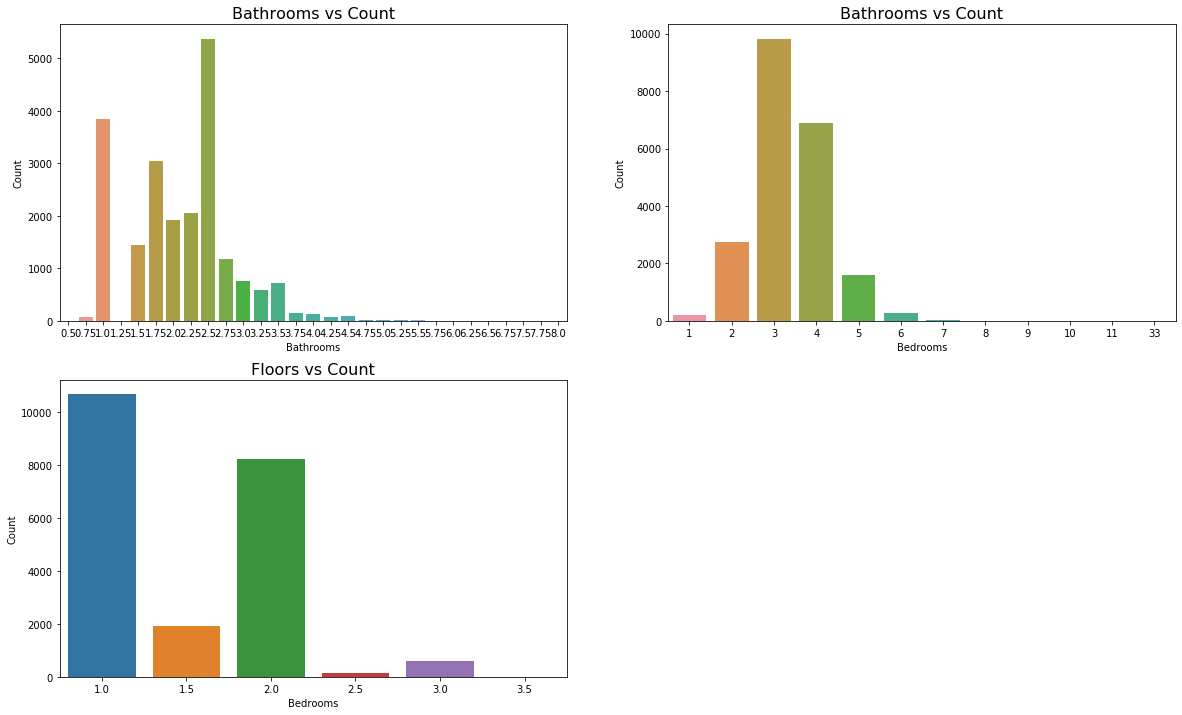

In [40]:
# Plots of defining house features
data['bedrooms'].head()
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
sns.countplot(x = 'bathrooms', data = data)
plt.title("Bathrooms vs Count", fontdict = {'fontsize' : 16})
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.subplot(2,2,2)
sns.countplot(x = 'bedrooms', data = data)
plt.title("Bathrooms vs Count", fontdict = {'fontsize' : 16})
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.subplot(2,2,3)
sns.countplot(x = 'floors', data = data)
plt.title("Floors vs Count", fontdict = {'fontsize' : 16})
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

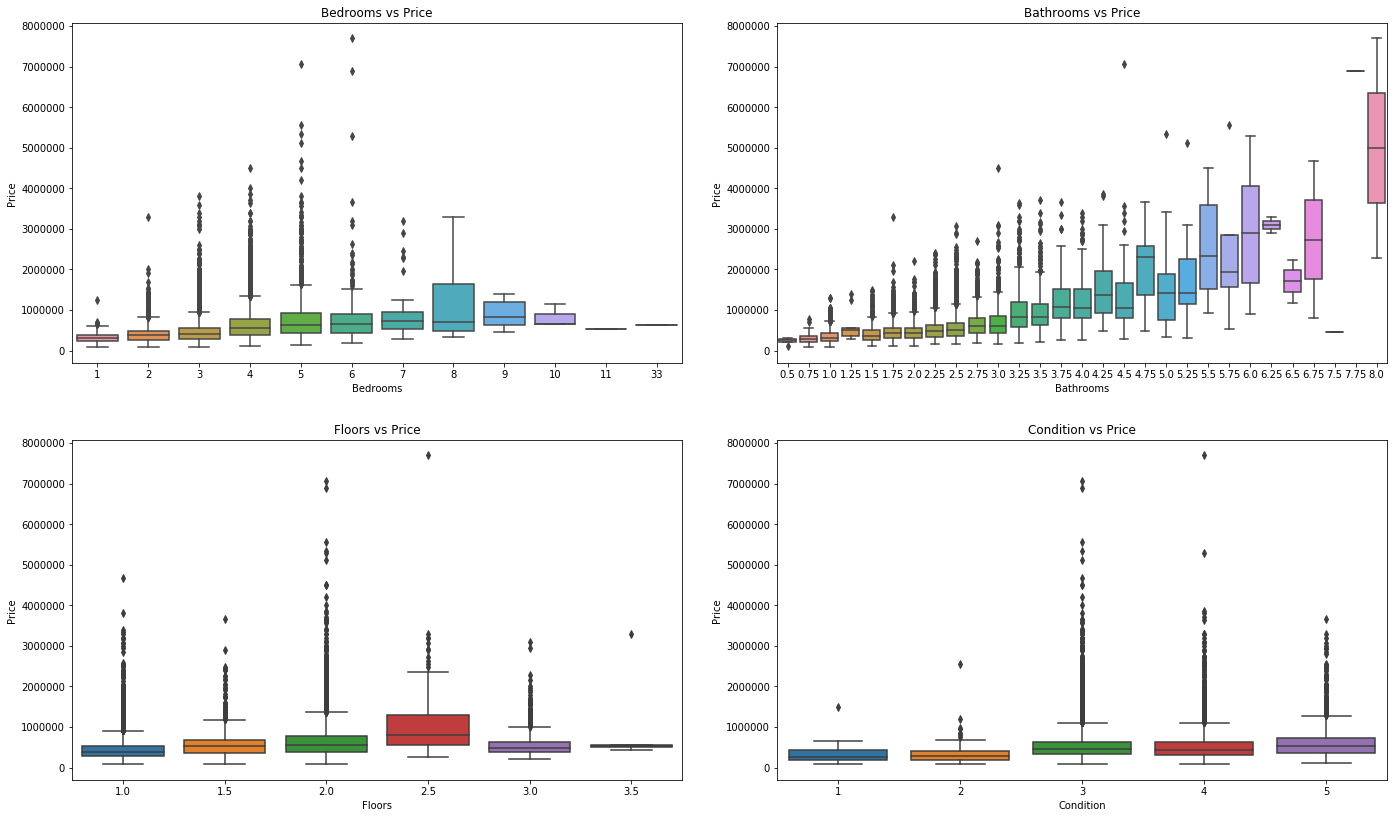

In [41]:
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'bedrooms', y = 'price', data = data)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.subplot(2,2,2)
sns.boxplot(x = 'bathrooms', y = 'price', data = data)
plt.title("Bathrooms vs Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.subplot(2,2,3)
sns.boxplot(x = 'floors', y = 'price', data = data)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.subplot(2,2,4)
sns.boxplot(x = 'condition', y = 'price', data = data)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.tight_layout(pad = 3)
plt.show()

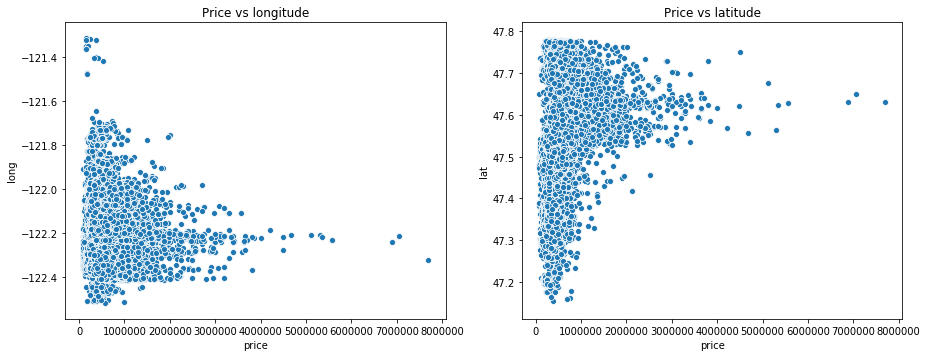

In [42]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(x='price',y='long',data=data)
plt.title("Price vs longitude")
plt.subplot(2,2,2)
sns.scatterplot(x='price',y='lat',data=data)
plt.title("Price vs latitude")
plt.show()

## Feature Engineering 

In [43]:
#feature Engineering 
data["month"] = (pd.DatetimeIndex(data['date']).month).astype(str)
data["year"] = (pd.DatetimeIndex(data['date']).year)
del data["date"]

del data['id']

data["yr_renovated"] = data["yr_renovated"].apply(lambda x : 1 if x>0 else 0)
data["age"]=data['year']-data["yr_built"]
data["sqft_with_basement"]=data["sqft_above"]+data["sqft_basement"]
data["sqft"]=data["sqft_living"]+data["sqft_lot"]
data["sqft15"]=data["sqft_living15"]+data["sqft_lot15"]
data["zipcode"] = data["zipcode"].astype(str)
data["condition"] = data["condition"].astype(str)
price = data["price"]

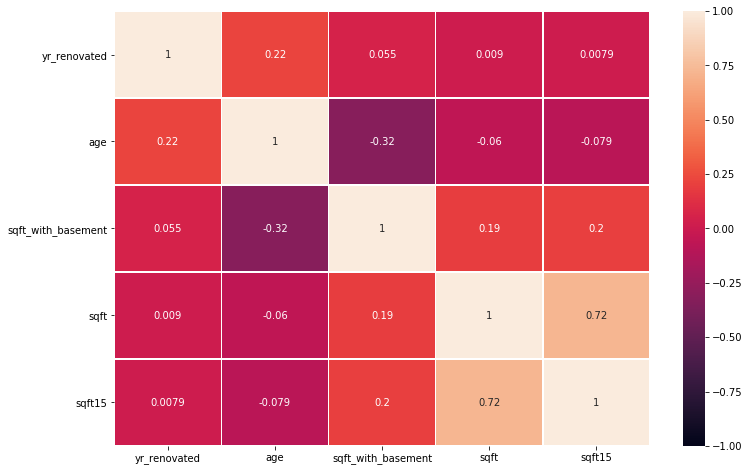

In [44]:
# correlations to find the good predictors 
plt.figure(figsize= (12,8))
sns.heatmap(data[['yr_renovated', 'age' , 'sqft_with_basement', 'sqft', 'sqft15', 'zipcode','condition']].corr(), 
            annot = True, linewidth = .5,vmin=-1, vmax=1)
plt.show()

# Model Implementation

In [45]:
#splitting X and Y
y = data["price"]
X = pd.get_dummies(data.loc[:, data.columns != 'price'], drop_first=True)

In [48]:
#sampling
size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= size,random_state=42)

In [47]:
size = 0.3

limit = int((1-size)*data.shape[0])


X_train = X.loc[0:limit,:]
y_train = y[0:limit+1]


X_test = X.loc[limit+1:X.shape[0],:]
y_test = y[limit+1:len(y)]


X_test1 = X.loc[limit+1:limit+int(len(y_test)/2)-1]
X_test2 = X.loc[limit+int(len(y_test)/2):len(y)]


y_test1 = y[limit+1:limit+int(len(y_test)/2)]
y_test2 = y[limit+int(len(y_test)/2):len(y)]

In [28]:
#linear regression
model = LinearRegression()
model.fit( X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=20)
print("Linear Regression:", model.score( X_test1, y_test1))
print("Linear Regression:", model.score( X_test2, y_test2))

Linear Regression: 0.8248891896747114
Linear Regression: 0.8173281673575812


In [33]:
#Decision Tree

dtr = DecisionTreeRegressor(max_depth=None) 
dtr.fit(X_train, y_train)
dtr_scores = cross_val_score(dtr, X_train, y_train, cv=20)
print("Decision Tree:", dtr.score(X_test1, y_test1))
print("Decision Tree:", dtr.score(X_test2, y_test2))

Decision Tree: 0.7302266990001491
Decision Tree: 0.7380003515781021


In [35]:
#KNN

knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(X_train, y_train)
knr_scores = cross_val_score(knr,X_train, y_train, cv=20)
print("4NN",knr.score(X_test1, y_test1))
print("4NN",knr.score(X_test2, y_test2))

4NN 0.4996740898890349
4NN 0.44327754749578563


In [36]:
#Random forest

from sklearn.ensemble import RandomForestRegressor
forest_cv = RandomForestRegressor(n_jobs=-1)
forest_cv.fit(X_train,y_train)
print("Random Forest:", forest_cv.score(X_test1, y_test1))
print("Random Forest:", forest_cv.score(X_test2, y_test2))

Random Forest: 0.8816937006063094
Random Forest: 0.8720644800814454


In [14]:
#XGBoost
err = []
predicted = []

for tree in [10, 20, 50, 100, 200]:
    for learnin_rate in [0.01, 0.1, 0.2, 0.5]:
        
        est = GradientBoostingRegressor(n_estimators=tree, learning_rate=learnin_rate,max_depth=4, random_state=0, 
                                        loss="ls").fit(X_train, y_train)
        
        vals = est.predict(X_test)
        predicted.append(est.predict(X_test))
        err.append(mean_squared_error(y_test, est.predict(X_test)))

pred_vals = predicted[err.index(min(err))]        

error = []
error.append([pred_vals[i]-np.array(y_test)[i] for i in range(len(np.array(y_test)))])
print("XGBoost", np.mean(error))

XGBoost 1345.649412715031


In [16]:
###creating budget
def budget(lower,upper):
    span = ([1 if lower<price[i]<upper else 0 for i in range(len(price))])
    return span

span = budget(1000000,5000000)

#Neural network
sc = StandardScaler()
X_encoded = sc.fit_transform(X)
x_train, x_test, Y_train, Y_test = train_test_split(X_encoded, span,
                                                    random_state = 0)
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])
classifier.fit(x_train,np.array(Y_train),batch_size=10,epochs=20,verbose = 0)

y_pred = classifier.predict(x_test)

threshold = 0.5
y_pred_th = [1 if y_pred[i]>threshold else 0 for i in range(len(y_test))]
cm = confusion_matrix(Y_test, y_pred_th)
print("Confusion Matrix",cm)
print("ANN:", roc_auc_score(Y_test, y_pred_th))

Confusion Matrix [[4965   82]
 [  80  273]]
ANN: 0.8785619146032956


In [18]:
# score reporting 
print("Linear Reg:", model.score( X_test, y_test))
print("Decision Trees:", dtr_scores.mean())
print("KNN:", knr_scores.mean())
print("Random Forest:", forest_cv.score( X_test, y_test))
print("XGBoost", np.mean(error))
print("ANN:", roc_auc_score(Y_test, y_pred_th))

Linear Reg: 0.7966759595884265
Decision Trees: 0.6785076296990797
KNN: 0.479307707209988
Random Forest: 0.8322005895000697
XGBoost 1345.649412715031
ANN: 0.8785619146032956
